# Dimension Reduction


This process is part of the pilot/prototype phase of data mining and is done before deploying a model. It is presented and discussed several dimension reduction approaches:

(1) incorporating domain knowledge to remove or combine categories

(2) using data summaries to detect information overlap between variables (and remove or combine redundant 
variables or categories)

(3) using data conversion techniques such as converting categorical variables into numerical variables, and

(4) employing automated reduction techniques, such as principal components analysis (PCA), where a new set of variables (which are weighted averages of the original variables) is created.

Finally, data mining methods such as regression models and classification and regression trees are presented as a way for removing redundant variables and for combining “similar” categories of categorical variables.

# Modules

In [1]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Example dataset: House Prices in Boston

For each neighborhood, a number of variables are given, such as the crime rate, the student/teacher ratio, and the median value of a housing unit in the neighborhood. A description of all 14 variables is given below:

    CRIM: Crime rate
    ZN: Percentage of residential land zoned for lots over 25,000 ft 2
    INDUS: Percentage of land occupied by nonretail business
    CHAS: Does tract bound Charles River? (= 1 if tract bounds river, = 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling 
    AGE: Percentage of owner-occupied units built prior to 1940 
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property tax rate per \\$10,000
    PTRATIO: Pupil-to-teacher ratio by town
    LSTAT: Percentage of lower status of the population 
    MEDV: Median value of owner-occupied homes in \\$1000s
    CAT.MEDV: Is median value of owner-occupied homes in tract above $30,000 (CAT.MEDV = 1) or not (CAT.MEDV = 0)?

In [2]:
boston_housing_df = pd.read_csv("../datasets/BostonHousing.csv")
boston_housing_df = boston_housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
boston_housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


## Summary Statistics

The first row represents the first neighborhood, which had an average per capita crime rate of 0.006, 18% of the residential land zoned for lots over 25,000 ft 2 , 2.31% of the land devoted to nonretail business, no border on the Charles River, and so on.

The following table shows summary statistics for the Boston Housing example. We immediately see that the different variables have very different ranges of values. We will soon see how variation in scale across variables can distort analyses if not treated properly. Another observation that can be made is that the mean of the first variable, CRIM (as well as several others), is much larger than the median, indicating right skew. None of the variables have missing values. There also do not appear to be indications of extreme values that might result from typing errors.

In [3]:
boston_housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [4]:
# compute mean, standard deviation, min, max, median, lenght, and missing values of CRIM
print("CRIM var")
print("Number of missing values: ", boston_housing_df.CRIM.isnull().sum())
print("Mean    : ", boston_housing_df.CRIM.mean())
print("Std. dev: ", boston_housing_df.CRIM.std())
print("Min     : ", boston_housing_df.CRIM.min())
print("Max     : ", boston_housing_df.CRIM.max())
print("Median  : ", boston_housing_df.CRIM.median())
print("Length  : ", len(boston_housing_df.CRIM))

# compute mean, standard dev., min, max, median, length, and missing values for all variables
pd.DataFrame({"mean": boston_housing_df.mean(),
              "std": boston_housing_df.std(),
              "min": boston_housing_df.min(),
              "max": boston_housing_df.max(),
              "median": boston_housing_df.median(),
              "length": len(boston_housing_df),
              "miss.val": boston_housing_df.isnull().sum(),
             })

CRIM var
Number of missing values:  0
Mean    :  3.613523557312254
Std. dev:  8.60154510533249
Min     :  0.00632
Max     :  88.9762
Median  :  0.25651
Length  :  506


,mean,std,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


Next, we summarize relationships between two or more variables. For numerical variables, we can compute a complete matrix of correlations between each pair of variables, using the pandas method corr(). The following table shows the correlation matrix for the Boston Housing variables. We see that most correlations are low and that many are negative.

In [5]:
boston_housing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


## Aggregation and Pivot Tables

Another very useful approach for exploring the data is aggregation by one or more variables. For aggregation by a single variable, we can use the pandas method value_counts(). The following table shows the number of neighborhoods that bound the Charles River vs. those that do not (the variable CHAS is chosen as the grouping variable). It appears that the majority of neighborhoods (471 of 506) do not bound the river.

In [6]:
boston_housing_df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

The groupby() method can be used for aggregating by one or more variables, and computing a range of summary statistics (count, mean, median, etc.). For categorical variables, we obtain a breakdown of the records by the combination of categories. The next table shows the result of computing the average MEDV by CHAS and RM. Note that the numerical variable RM (the average number of rooms per dwelling in the neighborhood) should be first grouped into bins of size 1 (0–1, 1–2, etc.). Note the empty values, denoting that there are no neighborhoods in the dataset with those combinations (e.g., bounding the river and having on average 3 rooms).

In [7]:
# create bins of size 1 for variable using the method pd.cut. By default, the method creates
# a categorical variable, e.g. (6, 7]. The argument labels=False determines integers instead,
# e.g. 6.
boston_housing_df["RM_bin"] = pd.cut(boston_housing_df.RM, range(0, 10), labels=False)

# compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the
# groupby method, then restrict the analysis to MEDV and determine the mean for each group.
boston_housing_df.groupby(["RM_bin", "CHAS"])["MEDV"].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

Another useful method is pivot_table() in the pandas package, that allows the creation of pivot tables by reshaping the data by the aggregating variables of our choice. The following table computes the average of MEDV by CHAS and RM and presents it as a pivot table.

In [8]:
# use pivot_table() to reshape data and generate pivot table
pd.pivot_table(boston_housing_df, values="MEDV", index=["RM_bin"], columns=["CHAS"],
               aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In classification tasks, where the goal is to find predictor variables that distinguish between two classes,
a good exploratory step is to produce summaries for each class. This can assist in detecting useful predictors that display some separation between the two classes. Data summaries are useful for almost any data mining task and are therefore an important preliminary step for cleaning and understanding the data before carrying out further analyses.

# Correlation Analysis

In datasets with a large number of variables (which are likely to serve as predictors), there is usually much overlap in the information covered by the set of variables. One simple way to find redundancies is to look at a correlation matrix. This shows all the pairwise correlations between variables. Pairs that have a very strong (positive or negative) correlation contain a lot of overlap in information and are good candidates for data reduction by removing one of the variables. Removing variables that are strongly correlated to others is useful for avoiding multicollinearity problems that can arise in various models. 

(Multicollinearity is the presence of two or more predictors sharing the same linear relationship with the outcome variable.)

<ipython-input-9-d4fec39ff54e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.0%}".format(x) for x in ax.get_yticks()])


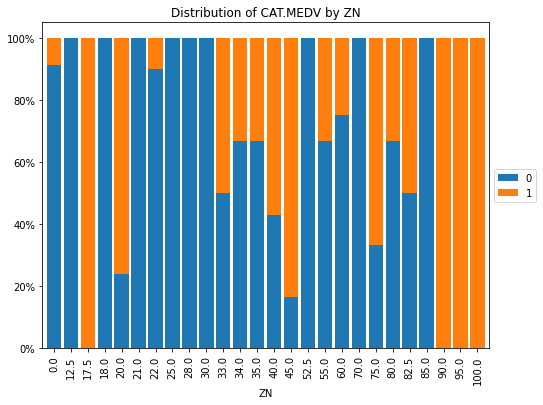

In [9]:
# use method crosstab to create a cross-tabulation of two variable
tbl = pd.crosstab(boston_housing_df.CAT_MEDV, boston_housing_df.ZN)

# convert numbers to ratios
prop_tbl = tbl / tbl.sum()
prop_tbl.round(2)

# plot the rations in a stacked bar chart
ax = prop_tbl.transpose().plot(kind="bar", stacked=True, figsize=(8, 6), width=0.85)
ax.set_yticklabels(["{:.0%}".format(x) for x in ax.get_yticks()])
plt.title("Distribution of CAT.MEDV by ZN")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Reducing the Number of Categories in Categorical Variables

When a categorical variable has many categories, and this variable is destined to be a predictor, many data mining methods will require converting it into many dummy variables. In particular, a variable with m categories will be transformed into either m or m − 1 dummy variables (depending on the method). This means that even if we have very few original categorical variables, they can greatly inflate the dimension of the dataset. One way to handle this is to reduce the number of categories by combining close or similar categories. Combining categories requires incorporating expert knowledge and common sense.

Generally, categories that contain very few observations are good candidates for combining with other categories. Use only the categories that are most relevant to the analysis and label the rest as “other".

An example is shown in the above figure, where the distribution of outcome variable CAT.MEDV is broken down by ZN (treated here as a categorical variable). We can see that the distribution of CAT.MEDV is identical for ZN = 17.5, 90, 95, and 100 (where all neighborhoods have CAT.MEDV = 1). These four categories can then be combined into a single category. Similarly, categories ZN where all neighborhoods have CAT.MEDV = 0 can be combined. Further combination is also possible based on similar bars.

In a time series context where we might have a categorical variable denoting season (such as month, or hour of day) that will serve as a predictor, reducing categories can be done by examining the time series plot and identifying similar periods. For example, the time plot in the next figure shows the quarterly revenues of Toys “R” Us between 1992 and 1995. Only quarter 4 periods appear different, and therefore, we can combine quarters 1–3 into a single category.

In [10]:
toys_df = pd.read_csv("../datasets/ToysRUsRevenues.csv")
toys_df.head()

,Index,QuarterYear,Revenue(in million $),Quarter
0,1,Q1-92,1026,Q1
1,2,Q2-92,1056,Q2
2,3,Q3-92,1182,Q3
3,4,Q4-92,2861,Q4
4,5,Q1-93,1172,Q1


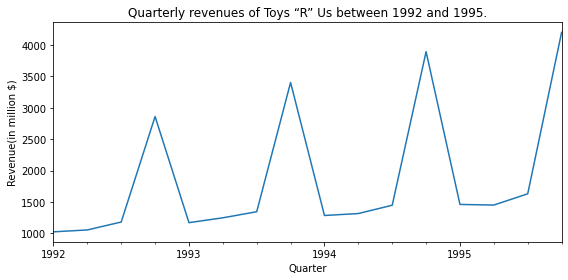

In [11]:
quarters = toys_df.QuarterYear.str.replace(r"(Q\d)-([0-9]+)", r"19\2\1", regex=True)
toys_df["Date"] = pd.PeriodIndex(quarters, freq="Q")
toys_ts = pd.Series(toys_df["Revenue(in million $)"].values, index=toys_df.Date)

fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)
toys_ts.plot(ax=ax, legend=False)

ax.set_ylabel("Revenue(in million $)")
ax.set_xlabel("Quarter")
ax.set_title("Quarterly revenues of Toys “R” Us between 1992 and 1995.")
plt.show()

# Converting a Categorical Variable to a Numerical Variable

Sometimes the categories in a categorical variable represent intervals. Common examples are age group or income bracket. If the interval values are known (e.g., category 2 is the age interval 20–30), we can replace the categorical value (“2” in the example) with the mid-interval value (here “25”). The result will be a numerical variable which no longer requires multiple dummy variables.